In [3]:
from scipy import misc
import tensorflow as tf
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from PIL import Image

(28, 28)


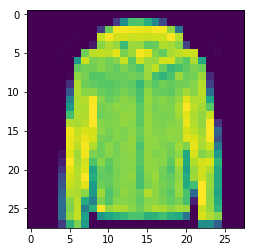

(28, 28)


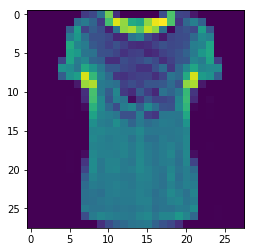

(28, 28)


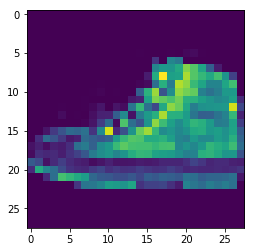

(28, 28)


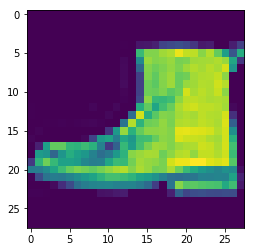

(28, 28)


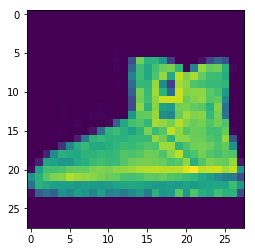

(28, 28)


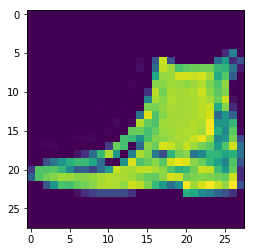

(28, 28)


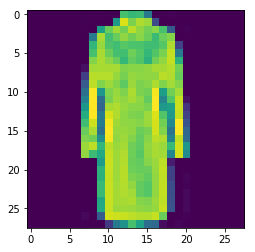

(28, 28)


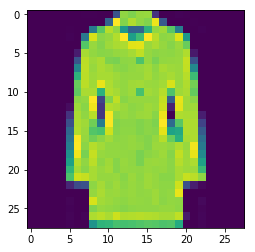

(28, 28)


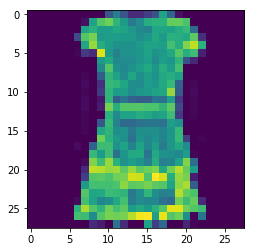

(28, 28)


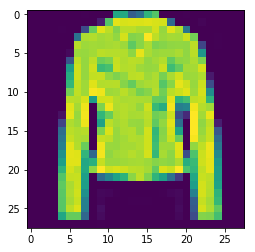

In [4]:
fileNameQue = tf.train.string_input_producer(["test.tfrecords"])
reader = tf.TFRecordReader()
key,value = reader.read(fileNameQue)
features = tf.parse_single_example(value,features={ 'Tlab': tf.FixedLenFeature([], tf.int64),
                                                    'Timg' : tf.FixedLenFeature([], tf.string)})

image = tf.decode_raw(features["Timg"], tf.float32)
image=tf.reshape(image,[28,28])
# label=tf.decode_raw(features["lab"],tf.int64)
label=features['Tlab']
label = tf.cast(label, tf.int32)
init = tf.global_variables_initializer()

with tf.Session() as sess:

    sess.run(init)

    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)

    for i in range(10):
        img, lab = sess.run([image, label])
        print(img.shape)

        result = Image.fromarray(img) 
        
        plt.imshow(img)
        plt.show()
        
        img = np.array(img, dtype='uint8')
        result=Image.fromarray(img)


        result.save('./test_image/'+str(i) +'_'+str(lab)+ '.png', 'png')

    coord.request_stop()
    coord.join(threads)